In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 days 0 hours 39 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_Paul_chj76n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.971 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train, valid, test = data.split_frame ([0.8,0.1], seed=60)

In [6]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

35258/4270/4450


In [8]:
y = "ArrDelay"
ignoreFields = ["IsArrDelayed", "ActualElapsedTime",
  "ArrTime", "TailNum"]
xWithDep = [i for i in train.names if i not in ignoreFields]

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [10]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances = True)
%time m_DLR_def.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 29.6 s


In [11]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 60.88960572551566
RMSE: 7.8031792062925005
MAE: 4.151743614590006
RMSLE: NaN
Mean Residual Deviance: 60.88960572551566


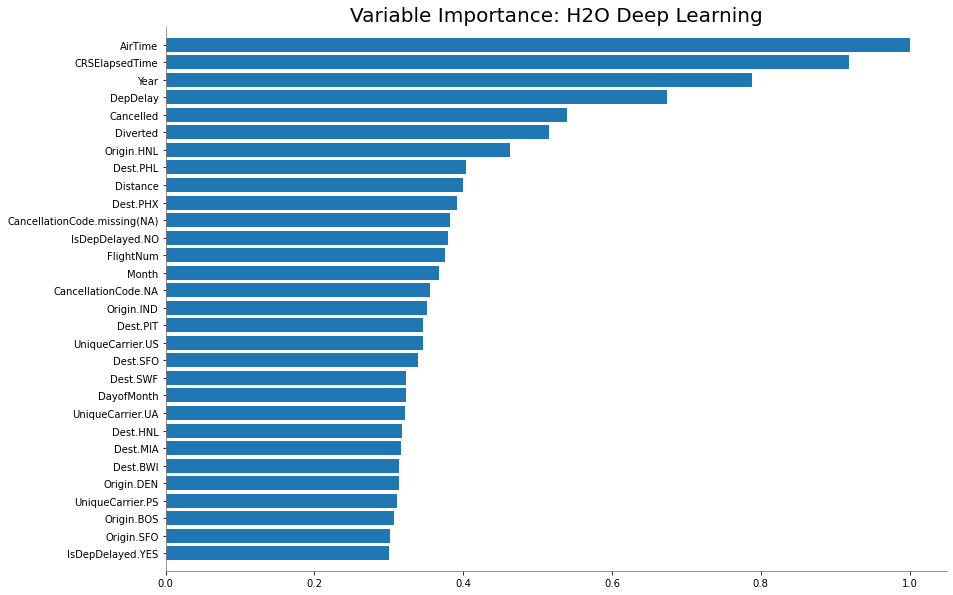

In [12]:
m_DLR_def.varimp_plot(30)

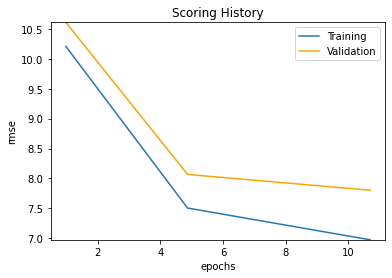

In [13]:
m_DLR_def.plot()

In [14]:
m_DLR_200_epochs = H2ODeepLearningEstimator(
            variable_importances = True,
            epochs = 200,
            stopping_rounds = 5, #default
            stopping_tolerance = 0, #default,
            stopping_metric = "deviance"
            )
%time m_DLR_200_epochs.train(xWithDep, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 2min 1s


In [15]:
m_DLR_200_epochs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 51.66510430028812
RMSE: 7.187844203952123
MAE: 3.7146047393385286
RMSLE: NaN
Mean Residual Deviance: 51.66510430028812


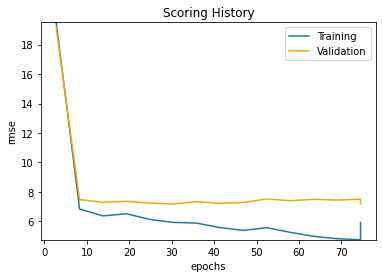

In [16]:
m_DLR_200_epochs.plot()

In [17]:
m_DLR_200_epochs.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-08-07 10:36:36,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-08-07 10:36:43,7.783 sec,13707 obs/sec,2.759629,1,97299.0,19.501898,380.324044,11.117852,0.599490,19.148499,366.665015,10.898442,0.588631
2,,2020-08-07 10:36:53,17.817 sec,17652 obs/sec,8.279681,3,291925.0,6.848708,46.904802,4.007065,0.950606,7.484923,56.024068,4.240006,0.937145
3,,2020-08-07 10:37:02,26.870 sec,19464 obs/sec,13.799308,5,486536.0,6.378304,40.682762,3.459596,0.957158,7.301473,53.311509,3.728744,0.940189
4,,2020-08-07 10:37:10,35.382 sec,20702 obs/sec,19.321289,7,681230.0,6.524999,42.575618,3.432967,0.955165,7.366822,54.270073,3.754077,0.939113
5,,2020-08-07 10:37:19,43.720 sec,21557 obs/sec,24.840490,9,875826.0,6.137042,37.663281,2.962951,0.960338,7.244109,52.477113,3.390561,0.941125
6,,2020-08-07 10:37:29,53.520 sec,21486 obs/sec,30.358557,11,1070382.0,5.938551,35.266390,3.252968,0.962862,7.187844,51.665104,3.714605,0.942036
7,,2020-08-07 10:37:37,1 min 1.517 sec,22117 obs/sec,35.880509,13,1265075.0,5.890033,34.692489,2.984256,0.963466,7.345728,53.959716,3.508668,0.939462
8,,2020-08-07 10:37:45,1 min 9.531 sec,22602 obs/sec,41.397186,15,1459582.0,5.584990,31.192115,3.119423,0.967152,7.225753,52.211500,3.727555,0.941423
9,,2020-08-07 10:37:52,1 min 17.252 sec,23075 obs/sec,46.909581,17,1653938.0,5.394197,29.097363,2.981187,0.969358,7.293959,53.201832,3.704993,0.940312


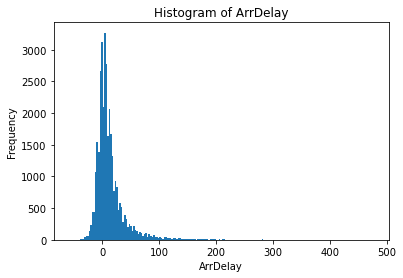

In [18]:
train[y].hist(200)

In [20]:
m_DLR_laplace = H2ODeepLearningEstimator(
            variable_importances = True,
            epochs = 10,
            stopping_rounds = 5, #default
            stopping_tolerance = 0, #default,
            stopping_metric = "deviance",
            distribution = "laplace"
            )
%time m_DLR_laplace.train(xWithDep, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 22.1 s


In [21]:
m_DLR_laplace

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1596552151253_142


Status of Neuron Layers: predicting ArrDelay, regression, laplace distribution, Absolute loss, 102,201 weights/biases, 1.2 MB, 377,333 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,308,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.117558,0.25271,0,-0.00243838,0.0910519,-0.0126177,0.251612
2,,3,200,Rectifier,0,0,0,0.335917,0.249979,0,-0.0366584,0.089881,0.723151,0.135186
3,,4,1,Linear,,0,0,0.0035172,0.00169564,0,0.00200477,0.025395,-0.409881,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 52.014301016665364
RMSE: 7.212094079854017
MAE: 3.6582420487137717
RMSLE: NaN
Mean Residual Deviance: 3.6582420487137717

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 62.18633557252269
RMSE: 7.885831317782716
MAE: 3.947632786944049
RMSLE: NaN
Mean Residual Deviance: 3.947632786944049

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-08-07 10:49:27,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-08-07 10:49:30,3.065 sec,14370 obs/sec,0.972914,1,34303.0,9.227955,6.062503,6.062503,0.901735,9.591365,6.227502,6.227502,0.896790
2,,2020-08-07 10:49:37,9.889 sec,23932 obs/sec,5.837484,6,205818.0,7.212094,3.658242,3.658242,0.939978,7.885831,3.947633,3.947633,0.930232
3,,2020-08-07 10:49:42,15.855 sec,27000 obs/sec,10.702053,11,377333.0,7.093501,3.810583,3.810583,0.941936,7.702609,4.053624,4.053624,0.933436
4,,2020-08-07 10:49:43,16.446 sec,26981 obs/sec,10.702053,11,377333.0,7.212094,3.658242,3.658242,0.939978,7.885831,3.947633,3.947633,0.930232



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AirTime,1.000000,1.000000,0.020252
1,CRSElapsedTime,0.915418,0.915418,0.018539
2,DepDelay,0.725725,0.725725,0.014697
3,Year,0.623772,0.623772,0.012633
4,Cancelled,0.398900,0.398900,0.008078
5,Diverted,0.352075,0.352075,0.007130
6,Distance,0.339820,0.339820,0.006882
7,CancellationCode.NA,0.281668,0.281668,0.005704
8,Dest.PHL,0.272748,0.272748,0.005524
9,FlightNum,0.268447,0.268447,0.005437



See the whole table with table.as_data_frame()
